In [1]:
import json 

import matplotlib.pyplot as plt
import numpy as np
import torch

from binarypredictor.datagen import DataGenerator, PolyGenerator

Order of polynomial p:  3
Order of polynomial q:  3
{0: {'p': array([  -8.2746,   56.7711, -110.2314,   63.7286]), 'q': [2.5769, -21.2338, 43.7691, -26.9073], 'pts': [(0.4303, 0.7958), (0.7589, 0.3518)]}}


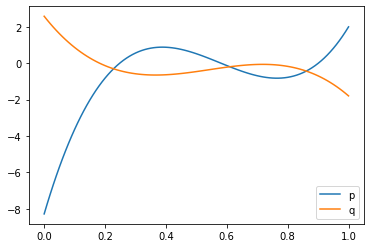

In [2]:
dg = DataGenerator()
dg.generate_data(1)

In [2]:
pg = PolyGenerator(2)

x = np.arange(0, 101)/100

pg.add_constraint(np.array([0.6]), 0, -5)
pg.add_constraint(np.array([0.2]), 0, 5)
pg.add_constraint(np.array([1.0]), 0, 5)

In [5]:
qg = PolyGenerator(2)

x = np.arange(0, 101)/100

qg.add_constraint(np.array([0.4]), 0, -5)
qg.add_constraint(np.array([0.0]), 0, 5)
qg.add_constraint(np.array([0.8]), 0, 5)

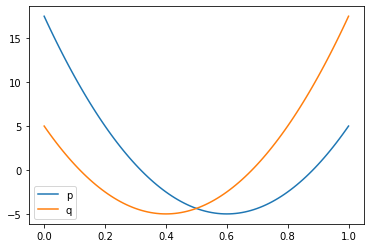

In [6]:
p = pg.get_values()
q = qg.get_values()

plt.plot(pg.x, p, label='p')
plt.plot(qg.x, q, label='q')
plt.legend()

In [7]:
x0s = np.arange(0., 1.1, step=0.1)

In [8]:
f1 = lambda x: pg.get_value_at_x(np.array([x]), 0)
df1 = lambda x: pg.get_value_at_x(np.array([x]), 1)
f2 = lambda x: qg.get_value_at_x(np.array([x]), 0)
df2 = lambda x: qg.get_value_at_x(np.array([x]), 1)

pts = []

def eqns(x):
    x1, x2 = x[0], x[1]
    eq1 = (df1(x1) - df2(x2))[0]
    eq2 = (df1(x1)*(x1 - x2) - (f1(x1) - f2(x2)))[0]
    return [eq1, eq2]

from scipy.optimize import least_squares
lb = (0, 0)   # lower bounds on x1, x2
ub = (1, 1)    # upper bounds

for x0i in x0s:
    for x0j in x0s:
        res = least_squares(eqns, [x0i, x0j], bounds=(lb, ub)) 
        x1, x2 = res.x.round(decimals=4)
        if res.cost < 1e-10 and (x1, x2) not in pts:
            pts.append((x1, x2))

print(pts)
dictionary = {'p': list(pg.c.round(decimals=4)), 'q': list(qg.c.round(decimals=4)), 'pts': pts}
print(dictionary)

[(0.6, 0.4)]
{'p': [17.5, -75.0, 62.5], 'q': [5.0, -50.0, 62.5], 'pts': [(0.6, 0.4)]}


In [8]:
json_object = json.dumps(dictionary, indent = 4) 
print(json_object)

{
    "p": [
        17.5,
        -75.0,
        62.5
    ],
    "q": [
        10.625,
        -62.5,
        62.5
    ],
    "pts": [
        [
            0.6,
            0.5
        ]
    ]
}


In [9]:
with open('json_data.json', 'a') as outfile:
    json.dump(dictionary, outfile)